In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ----- Load dataset -----
df = pd.read_csv("Final_Marks_Data.csv")

In [3]:
# Rename columns to simpler names (IMPORTANT)
df.rename(columns={
    'Attendance(%)': 'Attendance',
    'Internal Test 1(out of 40)': 'Internal1',
    'Internal Test 2(out of 40)': 'Internal2',
    'Assignment score (out of 10)': 'Assignment',
    'Daily Study Hours': 'StudyHours',
    'Final Exam Marks(out of 100)': 'FinalMarks'
}, inplace=True)

print(df.head())
print(df.columns)

  Student_ID  Attendance (%)  Internal Test 1 (out of 40)  \
0      S1000              84                           30   
1      S1001              91                           24   
2      S1002              73                           29   
3      S1003              80                           36   
4      S1004              84                           31   

   Internal Test 2 (out of 40)  Assignment Score (out of 10)  StudyHours  \
0                           36                             7           3   
1                           38                             6           3   
2                           26                             7           3   
3                           35                             7           3   
4                           37                             8           3   

   Final Exam Marks (out of 100)  
0                             72  
1                             56  
2                             56  
3                             74  
4

In [5]:
# Convert numeric columns
numeric_cols = ['Attendance (%)','Internal Test 1 (out of 40)','Internal Test 2 (out of 40)','Assignment Score (out of 10)','StudyHours','Final Exam Marks (out of 100)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [8]:
# Sort for clear bar chart
df_sorted = df.sort_values(by="Final Exam Marks (out of 100)", ascending=False)


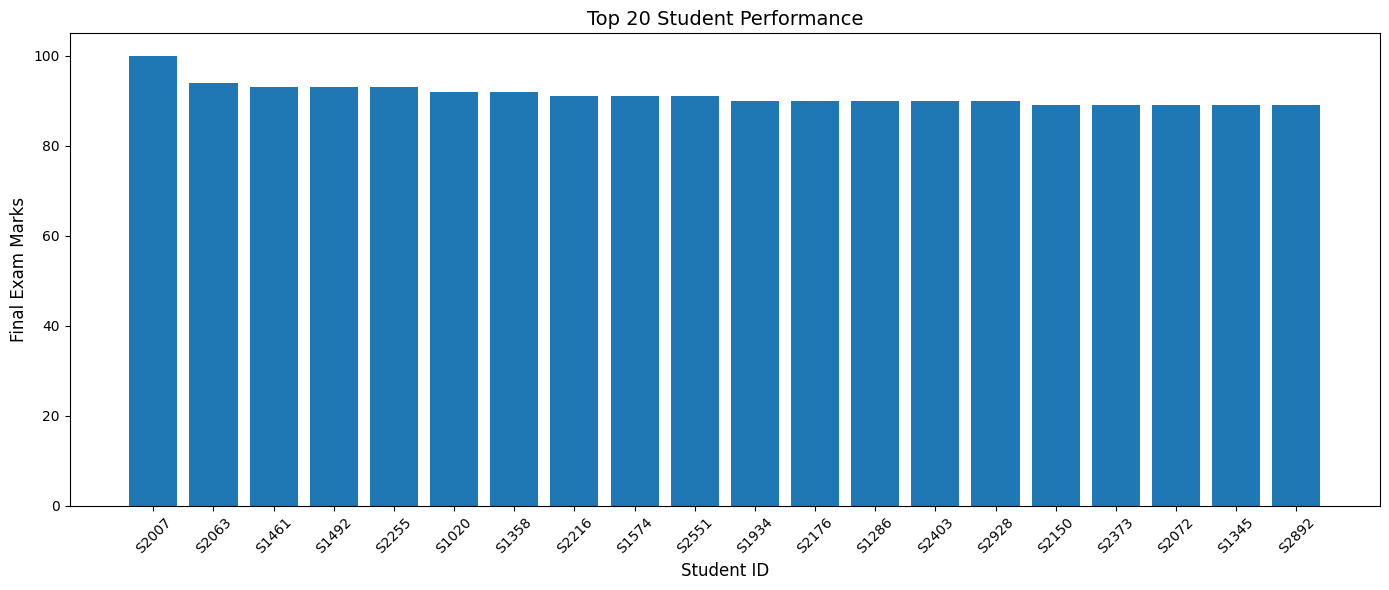

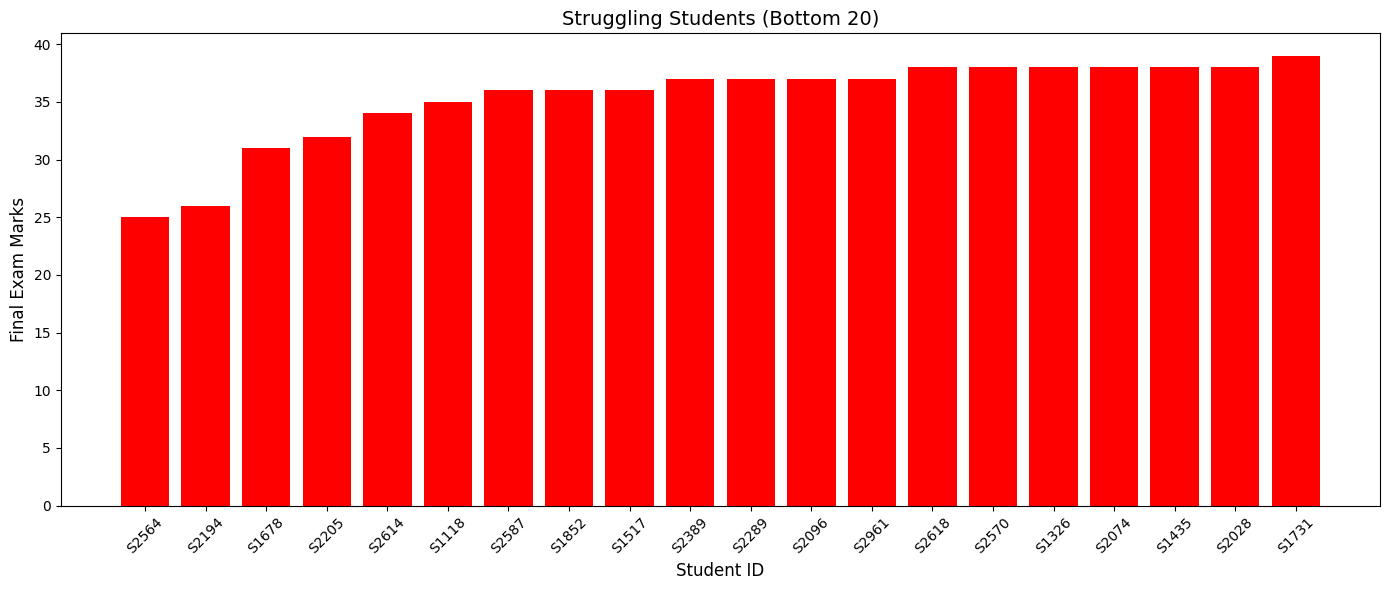

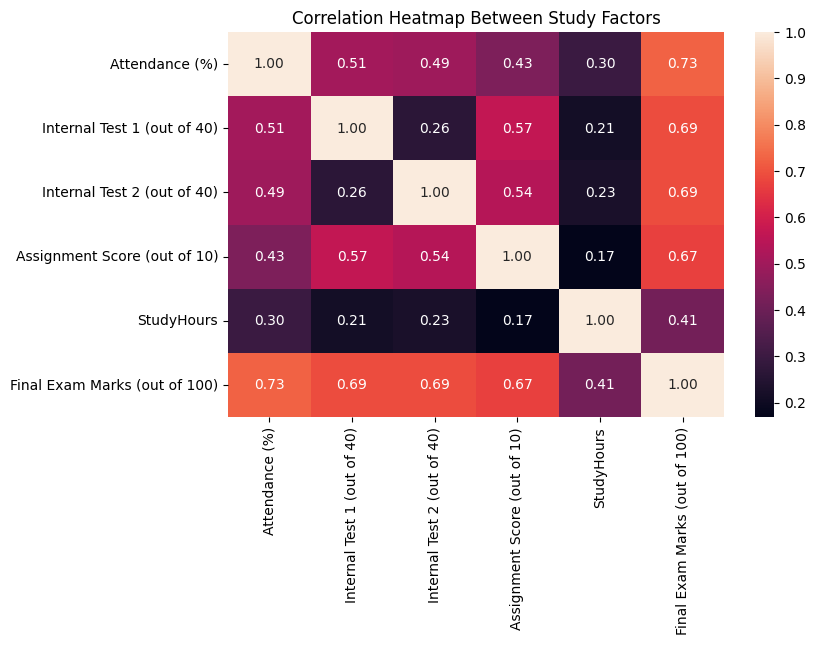

In [22]:
# Sort highest marks first
top20 = df.sort_values(by="Final Exam Marks (out of 100)", ascending=False).head(20)

plt.figure(figsize=(14,6))
plt.bar(top20['Student_ID'].astype(str), top20['Final Exam Marks (out of 100)'])
plt.xlabel("Student ID", fontsize=12)
plt.ylabel("Final Exam Marks", fontsize=12)
plt.title("Top 20 Student Performance", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

bottom20 = df.sort_values(by="Final Exam Marks (out of 100)").head(20)

plt.figure(figsize=(14,6))
plt.bar(bottom20['Student_ID'].astype(str), bottom20['Final Exam Marks (out of 100)'], color='red')
plt.xlabel("Student ID", fontsize=12)
plt.ylabel("Final Exam Marks", fontsize=12)
plt.title("Struggling Students (Bottom 20)", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# ----------- Correlation Heatmap ----------
plt.figure(figsize=(8,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap Between Study Factors")
plt.show()